# Анализ данных для интернет-магазина компьютерных игр «Стримчик»

 Цель работы: выявить закономерности определяющие успешность игры.\
 \
     План работы: 
 1) изучить информацию о дадасете и выпелнить предобработку: заполнить пропуски, удалить дубликаты, преобразовать типы данных, добавить столбцы.\
 2) провести исследовательский анализ данных.\
 3) проверить гипотезы\
 4) сформулировать вывод

### Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import binom
import math

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Вывод: имеем на входе таблицу размерностью в 16715 строк. Имеются пропуски в данных. Дубликатов нет.

In [27]:
df = df.drop_duplicates()

print(df[df.duplicated(['name', 'platform'])].count())
print(df[df.duplicated(['name', 'platform'])])
df = df.drop_duplicates(['name', 'platform'])
print(df[df.duplicated(['name', 'platform'])].count())

name               3
platform           3
year_of_release    3
genre              3
na_sales           3
eu_sales           3
jp_sales           3
other_sales        3
critic_score       3
user_score         3
rating             3
sum_sales          3
dtype: int64
                              name platform  year_of_release   genre  \
1591   Need for Speed: Most Wanted     X360             2005  Racing   
11715  Need for Speed: Most Wanted       PC             2012  Racing   
16230                Madden NFL 13      PS3             2012  Sports   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
1591        1.0      0.13      0.02         0.10          83.0         8.5   
11715       0.0      0.06      0.00         0.02          82.0         8.5   
16230       0.0      0.01      0.00         0.00          83.0         5.5   

      rating  sum_sales  
1591       T       1.25  
11715      T       0.08  
16230      E       0.01  
name               0
platform

### Шаг 2. Подготовьте данные


#### Замена названий столбцов (приведите к нижнему регистру);

In [28]:
df = df.rename(columns={'Name':'name', 'Platform':'platform', 'Year_of_Release':'year_of_release','Genre':'genre', \
                        'NA_sales':'na_sales','EU_sales':'eu_sales', 'JP_sales':'jp_sales', \
                        'Other_sales':'other_sales', 'Critic_Score':'critic_score', 'User_Score':'user_score', \
                        'Rating':'rating'})
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


#### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;


In [29]:
df.dropna(subset=['year_of_release'], inplace=True)

In [30]:
df['year_of_release'] = df['year_of_release'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16441 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16441 non-null  object 
 1   platform         16441 non-null  object 
 2   year_of_release  16441 non-null  int64  
 3   genre            16441 non-null  object 
 4   na_sales         16441 non-null  float64
 5   eu_sales         16441 non-null  float64
 6   jp_sales         16441 non-null  float64
 7   other_sales      16441 non-null  float64
 8   critic_score     7980 non-null   float64
 9   user_score       7460 non-null   float64
 10  rating           9765 non-null   object 
 11  sum_sales        16441 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [31]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Необходимо было изменить типы данных в столбцах year_of_release и user_score. В первом случае нам необходимо привести тип данных к int, так как год -- это целое число. Предварительно удалила записи с пропущенными значениями по году выпуска, так как их значение не велико и заменять на медиану нет смысла. В значениях же столбца user_score встречается значение "tbd" -- оно не дает изменить тип данных с object на float. Оставим пока как есть, разберемся с ним позже.

#### Обработайте пропуски при необходимости:
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишите причины, которые могли привести к пропускам;


In [32]:
df.dropna(subset=['name'], inplace=True)
df.dropna(subset=['genre'], inplace=True)

По 2 пропущенных значения в выше приведенных столбцах. Удалила их. Теперь перейдем к пропускам в столбцах Critic_Score (8578 пропусков), User_Score (6701 пропуск) и Rating (6766 пропусков).

Для данных critic_score и user_score не целесообразно заменять пропуски. Оставим как есть.

Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;


In [33]:
df.loc[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales


TBD - аббревиатура от английского To Be Determined (будет определено). Значит можно приравнять эти значения к пропускам, преобразовать в нан и заменить на медиану по жанрам. 

In [34]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

df.isna().sum() #замена прошла верно

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
sum_sales             0
dtype: int64

In [13]:
#теперь можно изменить тип данных у столбца user_score. Заменим object на float.

df['user_score'] = df['user_score'].astype('float')

In [35]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
sum_sales             0
dtype: int64

Заменим пропуски в столбце c рейтингом от организации ESRB значением "unknown".

In [85]:
df['rating'] = df['rating'].fillna('unknown')
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
sum_sales             0
dtype: int64

Пропусков не осталось, можно приступать к дальнейшему анализу. Среди возможных причин можно выделить нежелание пользователей ставить оценки играм или неверно выгруженные данные.

#### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [36]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales']+ df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Шаг 3. Проведите исследовательский анализ данных

#### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

<AxesSubplot:title={'center':'распределение игр по годам'}, xlabel='год выпуска', ylabel='кол-во игр'>

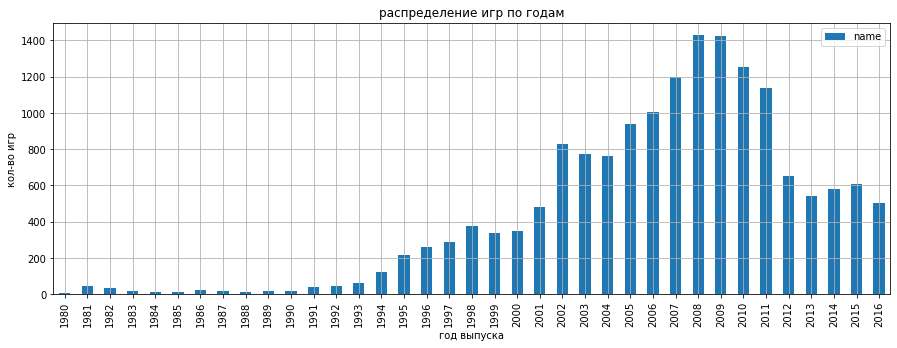

In [37]:
(
    df
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(grid=True, kind = 'bar',figsize=(15, 5),title = 'распределение игр по годам', ylabel = 'кол-во игр',xlabel = 'год выпуска')
)

Данные за весь период нам не важны, так как наибольшее количество игр выпускалось с 1995 по 2016 год. В 2002 и 2008 годах видим резкие скачки в количестве игр, вероятнее всего это связано с появленеим новых платформ, а следовательно и новых возможностей для разработчиков. с 2012 года наблюдается спад количества новых игр. Также стоит отметить, что с 2012-2016 год наблюдаем относительную стагнацию касаемо количества новых игр.

#### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

<AxesSubplot:title={'center':'распределение продаж по годам'}, xlabel='год выпуска', ylabel='продажи'>

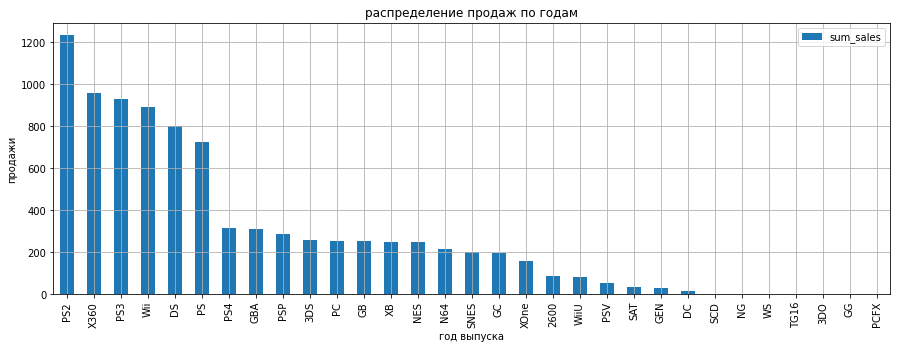

In [19]:
(
    df
    .pivot_table(index='platform', values='sum_sales', aggfunc='sum')
    .sort_values(by='sum_sales', ascending=False)
    .plot(grid=True, kind = 'bar',figsize=(15, 5),title = 'распределение продаж по годам', ylabel = 'продажи',xlabel = 'год выпуска')
)


Возьмем топ-6 для дальнейшего анализа.

<AxesSubplot:title={'center':'распределение по годам'}, xlabel='год выпуска', ylabel='продажи'>

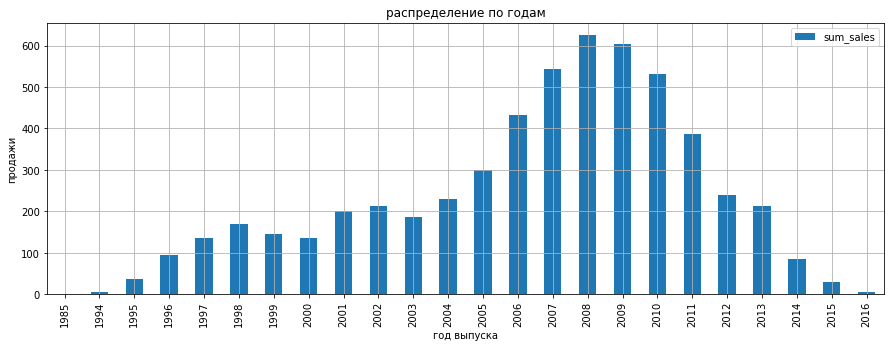

In [20]:
platform_max = df.query('platform in ["PS2", "X360" , "DS", "PS3", "Wii", "PS" ]')
platform_max.pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum').plot(grid=True, kind = 'bar', \
                                                                                          figsize=(15, 5), \
                                                                                          title = 'распределение по годам',\
                                                                                          ylabel = 'продажи',\
                                                                                         xlabel = 'год выпуска')

 Посмотрим за какой характерный срок появляются новые и исчезают старые платформы:

<AxesSubplot:title={'center':'PS2'}, xlabel='год выпуска', ylabel='продажи'>

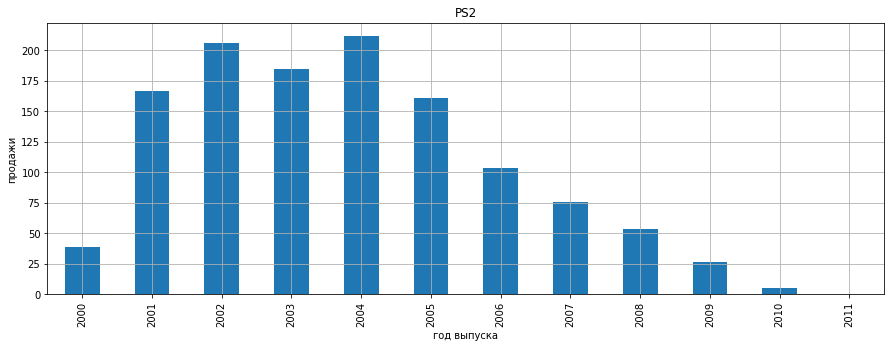

In [38]:
(platform_max
    .query('platform == "PS2"')
    .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum')
    .sort_values('year_of_release')['sum_sales']
    .plot(grid=True, kind = 'bar', figsize=(15, 5), title = 'PS2',\
           ylabel = 'продажи',xlabel = 'год выпуска'))

<AxesSubplot:title={'center':'X360'}, xlabel='год выпуска', ylabel='продажи'>

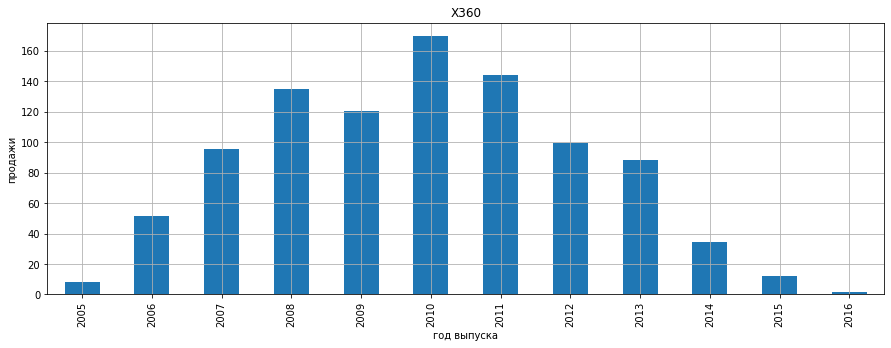

In [23]:
(platform_max
    .query('platform == "X360"')
    .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum')
    .sort_values('year_of_release')['sum_sales']
    .plot(grid=True, kind = 'bar', figsize=(15, 5), title = 'X360',\
           ylabel = 'продажи',xlabel = 'год выпуска'))

<AxesSubplot:title={'center':'DS'}, xlabel='год выпуска', ylabel='продажи'>

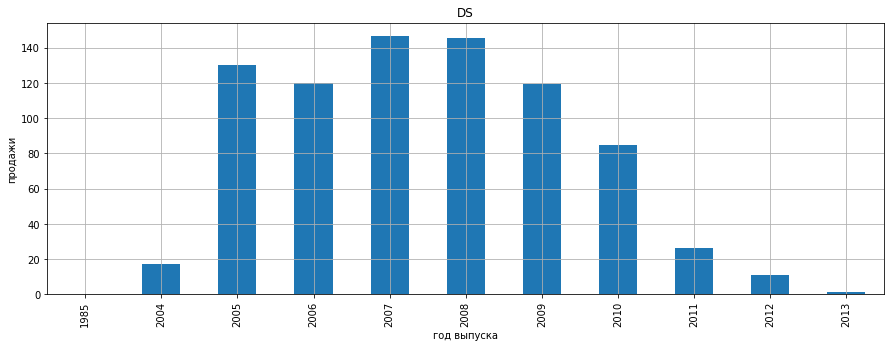

In [24]:
(platform_max
    .query('platform == "DS"')
    .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum')
    .sort_values('year_of_release')['sum_sales']
    .plot(grid=True, kind = 'bar', figsize=(15, 5), title = 'DS',\
           ylabel = 'продажи',xlabel = 'год выпуска'))

In [25]:
platform_max.query('platform == "DS" and year_of_release == 1985')
platform_max = platform_max.drop(index= 15957)

<AxesSubplot:title={'center':'DS'}, xlabel='год выпуска', ylabel='продажи'>

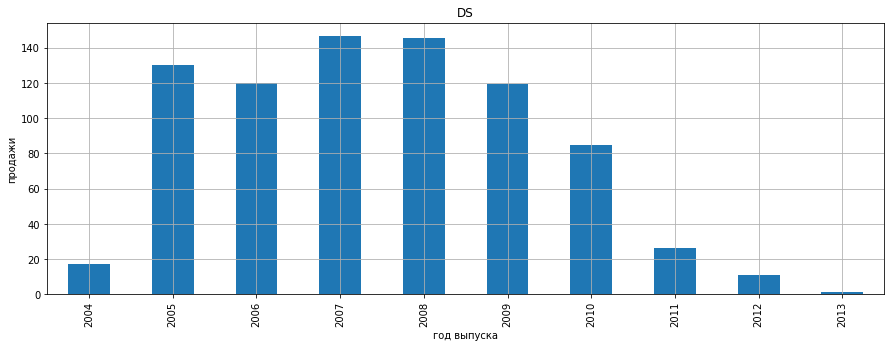

In [40]:
(platform_max
    .query('platform == "DS"')
    .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum')
    .sort_values('year_of_release')['sum_sales']
    .plot(grid=True, kind = 'bar', figsize=(15, 5), title = 'DS',\
           ylabel = 'продажи',xlabel = 'год выпуска'))

<AxesSubplot:title={'center':'PS3'}, xlabel='год выпуска', ylabel='продажи'>

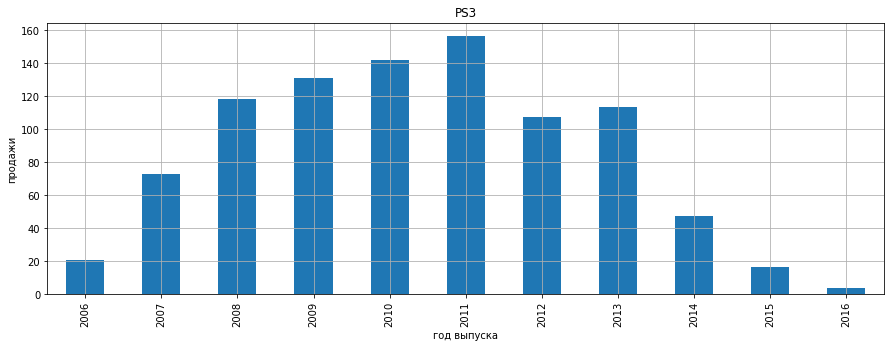

In [41]:
(platform_max
    .query('platform == "PS3"')
    .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum')
    .sort_values('year_of_release')['sum_sales']
    .plot(grid=True, kind = 'bar', figsize=(15, 5), title = 'PS3',\
           ylabel = 'продажи',xlabel = 'год выпуска'))

<AxesSubplot:title={'center':'Wii'}, xlabel='год выпуска', ylabel='продажи'>

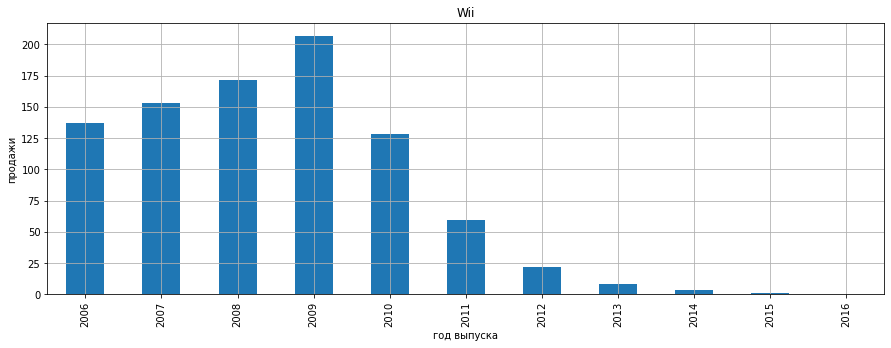

In [42]:
(platform_max
    .query('platform == "Wii"')
    .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum')
    .sort_values('year_of_release')['sum_sales']
    .plot(grid=True, kind = 'bar', figsize=(15, 5), title = 'Wii',\
           ylabel = 'продажи',xlabel = 'год выпуска'))

<AxesSubplot:title={'center':'PS'}, xlabel='год выпуска', ylabel='продажи'>

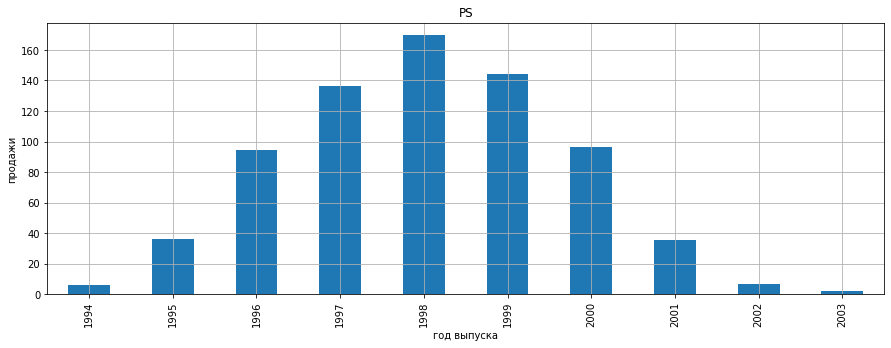

In [43]:
(platform_max
    .query('platform == "PS"')
    .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum')
    .sort_values('year_of_release')['sum_sales']
    .plot(grid=True, kind = 'bar', figsize=(15, 5), title = 'PS',\
           ylabel = 'продажи',xlabel = 'год выпуска'))

По графикам можно сделать вывод, что платформы используются в течение 10-12 лет. Наибольшее количество продаж приходится на 4-6 год с момента появления платформы.

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.

<AxesSubplot:title={'center':'распределение продаж по годам'}, xlabel='год выпуска', ylabel='продажи'>

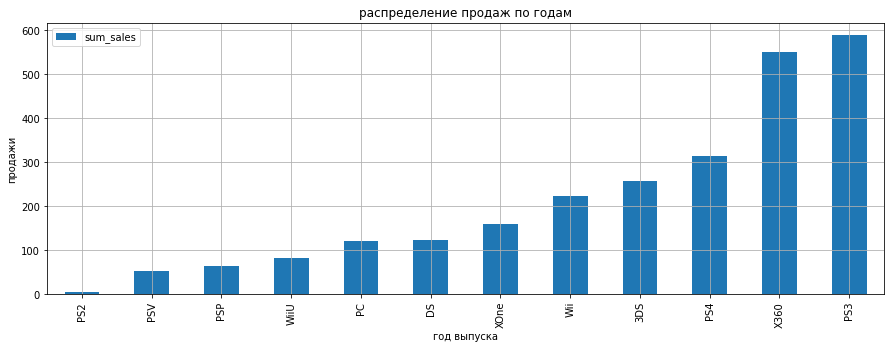

In [44]:
(
    df
    .query('year_of_release >= 2010')
    .pivot_table(index='platform', values='sum_sales', aggfunc='sum')
    .sort_values(by='sum_sales')
    .plot(grid=True, kind = 'bar',figsize=(15, 5),title = 'распределение продаж по годам', ylabel = 'продажи',xlabel = 'год выпуска')
)

На графике видим платформы, которые принесли наибольшую прибыль за последние 6 лет. Но все ли можно считать перспективными? нет, так как стоит учитывать, что платформы теряют актуальность каждые 10-12 лет. У PS3 и X360 уже был пик по продажам в 2010-2011 годах, сейчас их продажи падают. Ситуация с Wii еще хуже, чем с первыми двумя. Проверим PS4, 3DS XOne, WiiU на предмет перспективы роста продаж. 

<AxesSubplot:title={'center':'PS4'}, xlabel='год выпуска', ylabel='продажи'>

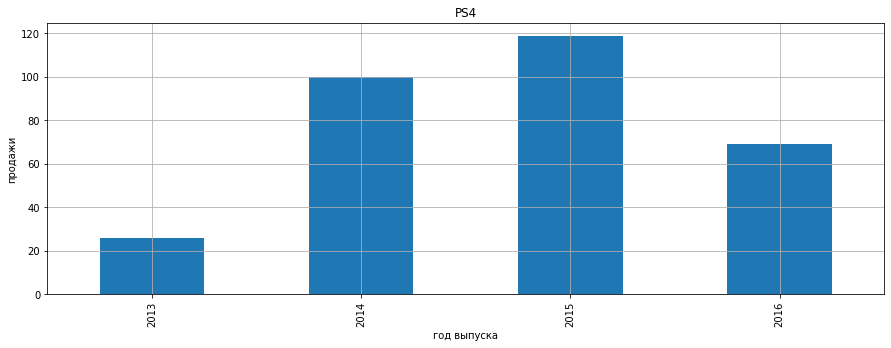

In [45]:
(df
    .query('platform == "PS4"')
    .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum')
    .sort_values('year_of_release')['sum_sales']
    .plot(grid=True, kind = 'bar', figsize=(15, 5), title = 'PS4',\
           ylabel = 'продажи',xlabel = 'год выпуска'))

<AxesSubplot:title={'center':'3DS'}, xlabel='год выпуска', ylabel='продажи'>

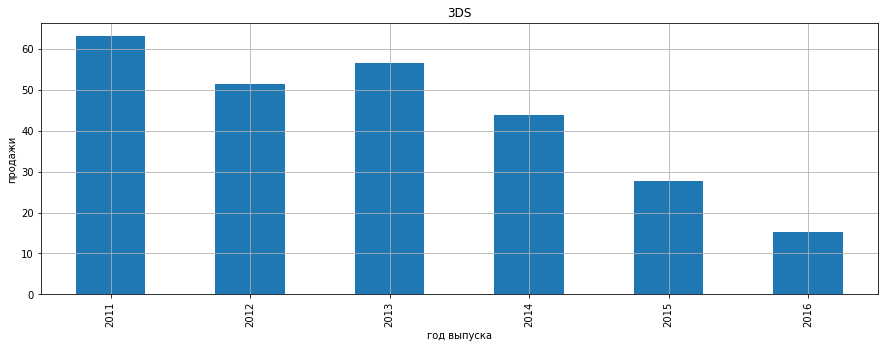

In [46]:
(df
    .query('platform == "3DS"')
    .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum')
    .sort_values('year_of_release')['sum_sales']
    .plot(grid=True, kind = 'bar', figsize=(15, 5), title = '3DS',\
           ylabel = 'продажи',xlabel = 'год выпуска'))

Существует уже достаточно продолжительное время и продажи идут на спад. Не является перспективной платформой.

<AxesSubplot:title={'center':'XOne'}, xlabel='год выпуска', ylabel='продажи'>

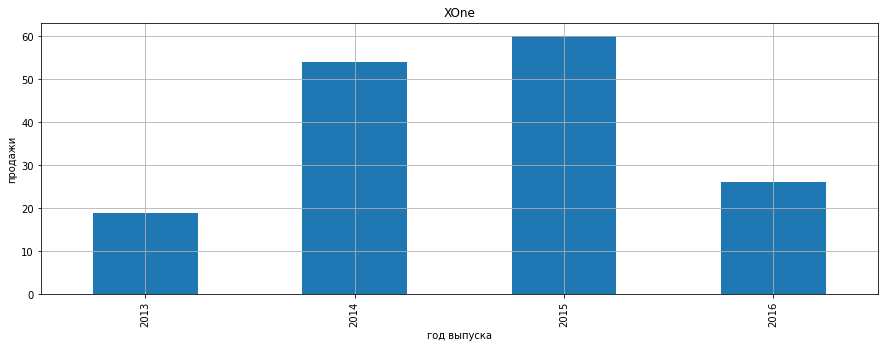

In [47]:
(df
    .query('platform == "XOne"')
    .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum')
    .sort_values('year_of_release')['sum_sales']
    .plot(grid=True, kind = 'bar', figsize=(15, 5), title = 'XOne',\
           ylabel = 'продажи',xlabel = 'год выпуска'))

<AxesSubplot:title={'center':'WiiU'}, xlabel='год выпуска', ylabel='продажи'>

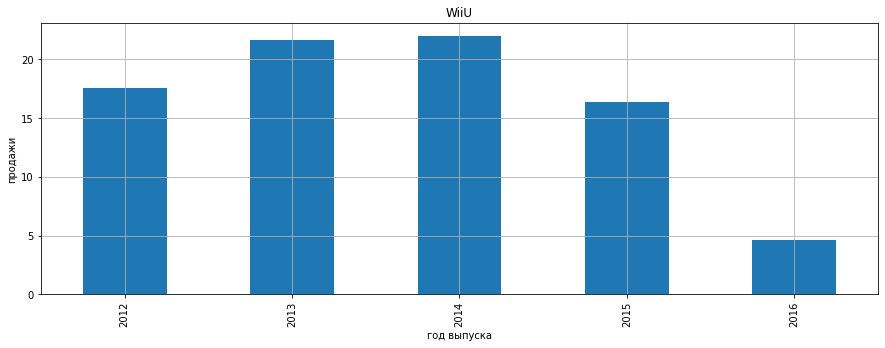

In [48]:
(df
    .query('platform == "WiiU"')
    .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum')
    .sort_values('year_of_release')['sum_sales']
    .plot(grid=True, kind = 'bar', figsize=(15, 5), title = 'WiiU',\
           ylabel = 'продажи',xlabel = 'год выпуска'))

Появилась относительно недавно, но продажи падают поледние 2 года. Не является перспективной платформой.

<AxesSubplot:title={'center':'PSP'}, xlabel='год выпуска', ylabel='продажи'>

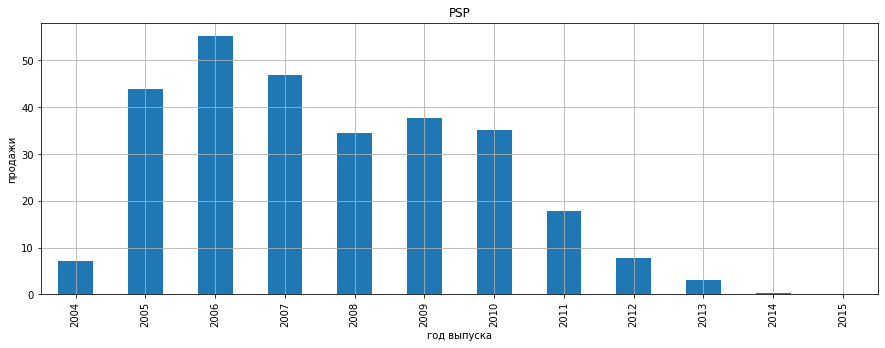

In [49]:
(df
    .query('platform == "PSP"')
    .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum')
    .sort_values('year_of_release')['sum_sales']
    .plot(grid=True, kind = 'bar', figsize=(15, 5), title = 'PSP',\
           ylabel = 'продажи',xlabel = 'год выпуска'))

Существует уже достаточно продолжительное время и продажи идут на спад. Не является перспективной платформой.

Делаем вывод, что наиболее перспективными платформами являются PS4, XOne.

#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

Text(0, 0.5, 'Продажи')

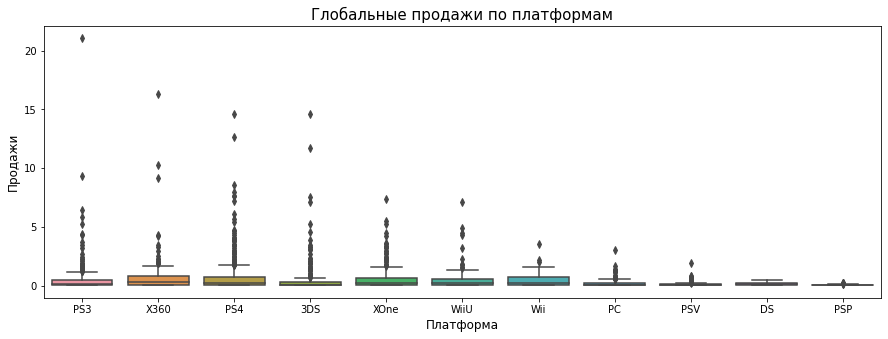

In [88]:
actual_pl = df.query('year_of_release >= 2013')

plt.figure(figsize=(15,5))
sns.boxplot(data=actual_pl, x='platform', y='sum_sales')
plt.title('Глобальные продажи по платформам', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи',fontsize=12)

Text(0, 0.5, 'Продажи')

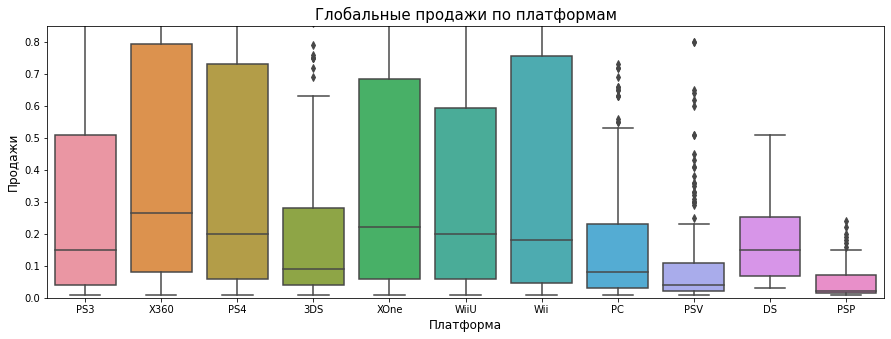

In [51]:
plt.figure(figsize=(15,5))
sns.boxplot(data=actual_pl, x='platform', y='sum_sales')
plt.ylim([0, 0.85])
plt.title('Глобальные продажи по платформам', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи',fontsize=12)

In [ ]:
actual_pl.describe()

Медианная сумма продаж 0.13, по всем платформам присутствуют выбросы.

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Bозьмем для анализа лидера по продажам -- платформу PS3.

In [52]:
PS3 = actual_pl.query('platform == "PS3"').dropna()
PS3.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
149,The Last of Us,PS3,2013,Action,2.41,2.18,0.28,0.99,95.0,9.1,M,5.86
337,Assassin's Creed IV: Black Flag,PS3,2013,Action,1.33,1.68,0.13,0.57,88.0,8.1,M,3.71


Корреляция между отзывами пользователей и продажами равна: 0.0023944027357566925


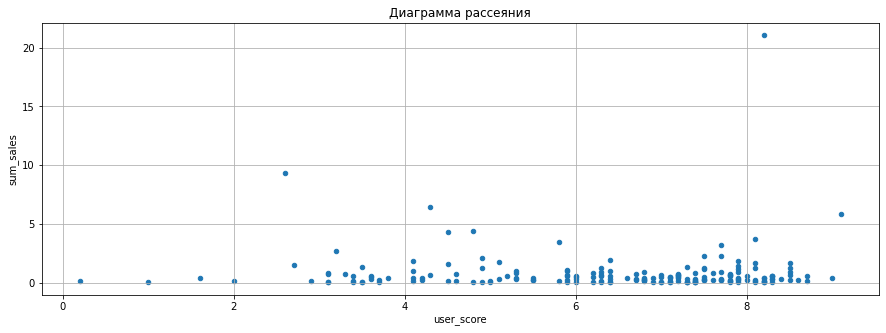

In [53]:
PS3 = actual_pl.query('platform == "PS3"')
PS3.plot.scatter (x = 'user_score', y = 'sum_sales', figsize=(15, 5), grid=True, title = 'Диаграмма рассеяния')
print('Корреляция между отзывами пользователей и продажами равна:', PS3['sum_sales'].corr(PS3['user_score']))

Отзывы пользователей слабо влияют на продажи внутри одной популярной платформы. 

Корреляция между отзывами критиков и продажами равна: 0.3342853393371919


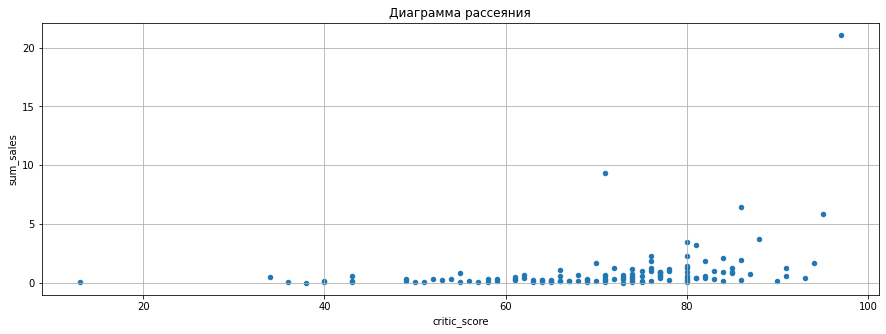

In [54]:
PS3.plot.scatter (x = 'critic_score', y = 'sum_sales', figsize=(15, 5), grid=True,\
                  title = 'Диаграмма рассеяния' )
print('Корреляция между отзывами критиков и продажами равна:', PS3['sum_sales'].corr(PS3['critic_score']))

Оценки критиков демонстрируют прямую, средне-слабую корреляцию с "цифрами" продаж. Оценки пользователей корреляции с продажами не имеют.

#### Соотнесите выводы с продажами игр на других платформах.

In [56]:
actual_pl_without_nan = actual_pl.dropna()
actual_pl_without_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942 entries, 16 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             942 non-null    object 
 1   platform         942 non-null    object 
 2   year_of_release  942 non-null    int64  
 3   genre            942 non-null    object 
 4   na_sales         942 non-null    float64
 5   eu_sales         942 non-null    float64
 6   jp_sales         942 non-null    float64
 7   other_sales      942 non-null    float64
 8   critic_score     942 non-null    float64
 9   user_score       942 non-null    float64
 10  rating           942 non-null    object 
 11  sum_sales        942 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 95.7+ KB


Корреляция между отзывами пользователей и продажами равна: -0.0026078133545982744


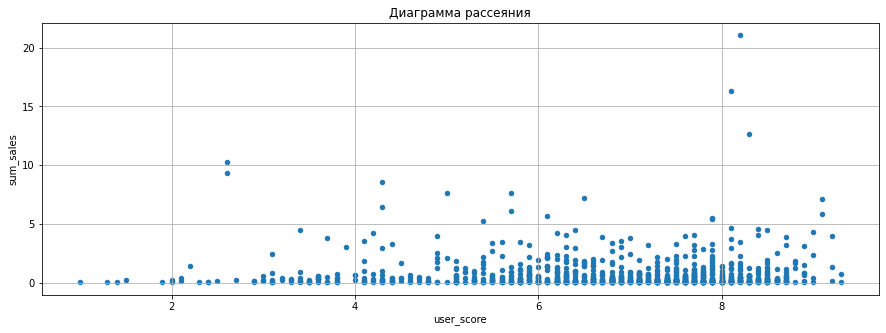

In [59]:
actual_pl_without_nan.plot.scatter (x = 'user_score', y = 'sum_sales', figsize=(15, 5), grid=True, title = 'Диаграмма рассеяния')
print('Корреляция между отзывами пользователей и продажами равна:', actual_pl['sum_sales'].corr(actual_pl['user_score']))

Корреляция между отзывами критиков и продажами равна: 0.3136995151027371


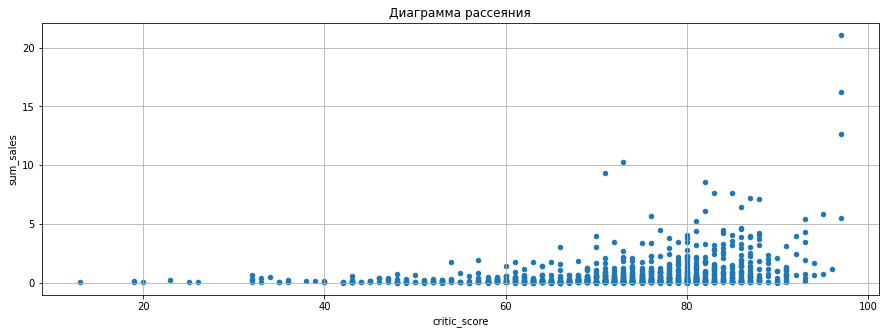

In [60]:
actual_pl_without_nan.plot.scatter (x = 'critic_score', y = 'sum_sales', figsize=(15, 5), grid=True, title = 'Диаграмма рассеяния')
print('Корреляция между отзывами критиков и продажами равна:', actual_pl['sum_sales'].corr(actual_pl['critic_score']))

Рассматривая продажи игр на других платформах, видим те же зависимости: oценки критиков демонстрируют прямую, средне-слабую корреляцию с "цифрами" продаж. Оценки пользователей корреляции с продажами не имеют.

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

<AxesSubplot:title={'center':'PSP'}, xlabel='год выпуска', ylabel='продажи'>

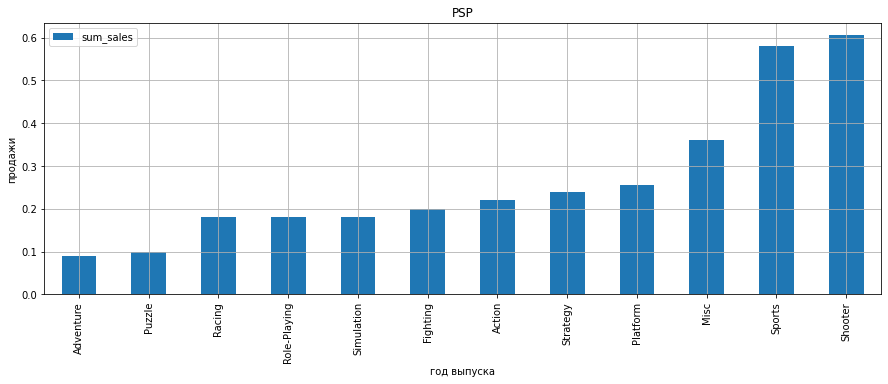

In [61]:
(
    actual_pl_without_nan
    .pivot_table(index = 'genre', values = 'sum_sales', aggfunc = 'median')
    .sort_values('sum_sales')
    .plot(grid=True, kind = 'bar', figsize=(15, 5), title = 'PSP',\
           ylabel = 'продажи',xlabel = 'год выпуска'))

Самым продаваемым жанром игр является Action, и наобот меньше всего прибыли принес жанр Puzzle.

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
count,766.000000,766.000000,766.000000,766.000000,766.000000,313.000000,389.000000,766.000000
mean,2014.603133,0.164556,0.154217,0.052859,0.048564,71.453674,6.837532,0.420196
std,1.043719,0.542802,0.516450,0.168198,0.191316,11.906093,1.330173,1.253909
min,2013.000000,0.000000,0.000000,0.000000,0.000000,26.000000,2.000000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,66.000000,6.300000,0.030000
50%,2015.000000,0.020000,0.020000,0.010000,0.010000,73.000000,7.100000,0.110000
75%,2015.000000,0.120000,0.120000,0.050000,0.030000,79.000000,7.800000,0.337500
max,2016.000000,9.660000,9.090000,2.790000,3.960000,97.000000,9.100000,21.050000


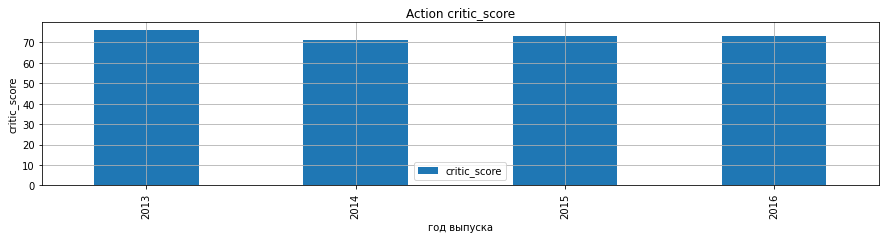

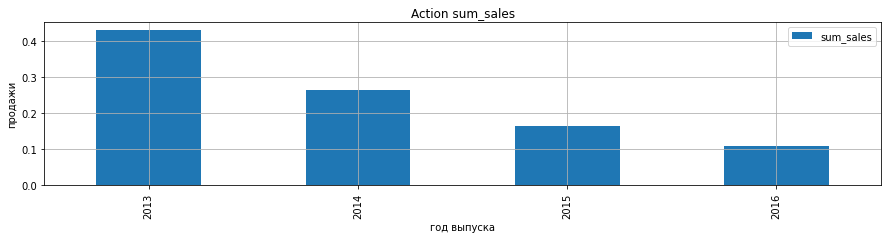

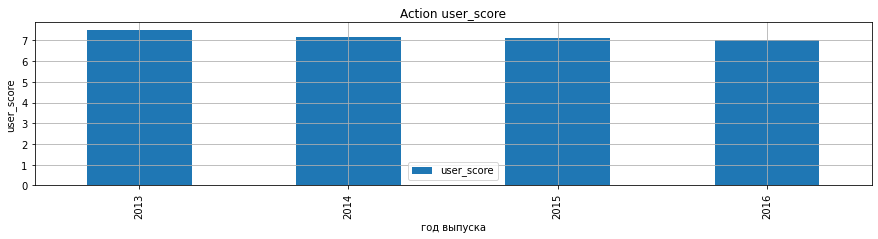

In [62]:
(
    actual_pl_without_nan
    .query('genre == "Action"')
    .pivot_table(index = 'year_of_release', values = 'critic_score', aggfunc = 'median')
    .plot(grid=True, kind = 'bar', figsize=(15, 3), title = 'Action critic_score',\
           ylabel = 'critic_score',xlabel = 'год выпуска'))

(
    actual_pl_without_nan
    .query('genre == "Action"')
    .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'median')
    .plot(grid=True, kind = 'bar', figsize=(15, 3), title = 'Action sum_sales',\
           ylabel = 'продажи',xlabel = 'год выпуска'))

(
    actual_pl_without_nan
    .query('genre == "Action"')
    .pivot_table(index = 'year_of_release', values = 'user_score', aggfunc = 'median')
    .plot(grid=True, kind = 'bar', figsize=(15, 3), title = 'Action user_score',\
           ylabel = 'user_score',xlabel = 'год выпуска'))

actual_pl.query('genre == "Action"').describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
count,17.000000,17.000000,17.000000,17.000000,17.000000,7.000000,7.000000,17.000000
mean,2014.294118,0.048824,0.058824,0.069412,0.009412,75.571429,7.471429,0.186471
std,0.848875,0.128398,0.141946,0.101456,0.022212,7.678045,0.941124,0.325172
min,2013.000000,0.000000,0.000000,0.000000,0.000000,68.000000,6.200000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,70.000000,6.850000,0.020000
50%,2014.000000,0.000000,0.000000,0.020000,0.000000,71.000000,7.500000,0.060000
75%,2015.000000,0.060000,0.020000,0.110000,0.010000,81.000000,8.150000,0.110000
max,2016.000000,0.530000,0.480000,0.340000,0.090000,88.000000,8.600000,1.190000


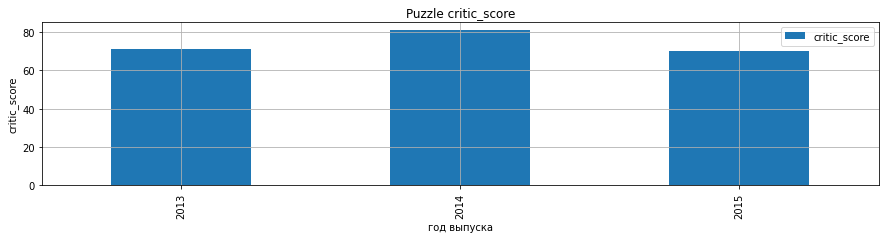

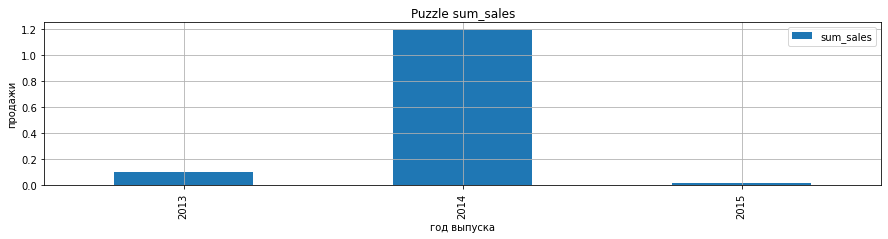

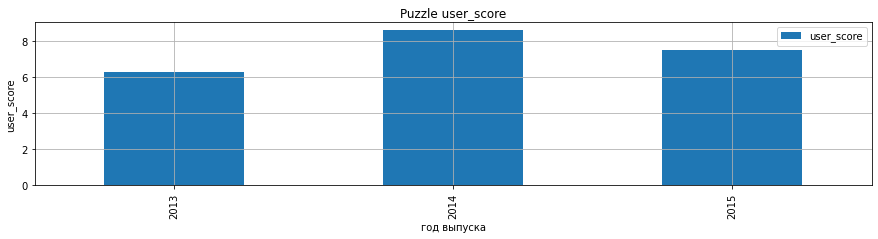

In [63]:
(
    actual_pl_without_nan
    .query('genre == "Puzzle"')
    .pivot_table(index = 'year_of_release', values = 'critic_score', aggfunc = 'median')
    .plot(grid=True, kind = 'bar', figsize=(15, 3), title = 'Puzzle critic_score',\
           ylabel = 'critic_score',xlabel = 'год выпуска'))

(
    actual_pl_without_nan
    .query('genre == "Puzzle"')
    .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'median')
    .plot(grid=True, kind = 'bar', figsize=(15, 3), title = 'Puzzle sum_sales',\
           ylabel = 'продажи',xlabel = 'год выпуска'))

(
    actual_pl_without_nan
    .query('genre == "Puzzle"')
    .pivot_table(index = 'year_of_release', values = 'user_score', aggfunc = 'median')
    .plot(grid=True, kind = 'bar', figsize=(15, 3), title = 'Puzzle user_score',\
           ylabel = 'user_score',xlabel = 'год выпуска'))

actual_pl.query('genre == "Puzzle"').describe()

Рассмотрев подробнее жанры Action и Puzzle, можно сказать, что у обоих достаточно высокие оценки критиков и пользователей. Однако первый принес больше продаж на всем рассматриваемом отрезке, кроме 2015 и 2016 годах. В то время как пазлы плохо продавались относительно на всем временном промежутке.

### Шаг 4. Составьте портрет пользователя каждого региона

#### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

Определите для пользователя Северной Америки:

<AxesSubplot:title={'center':'na_sales platform'}, xlabel='platform', ylabel='na_sales'>

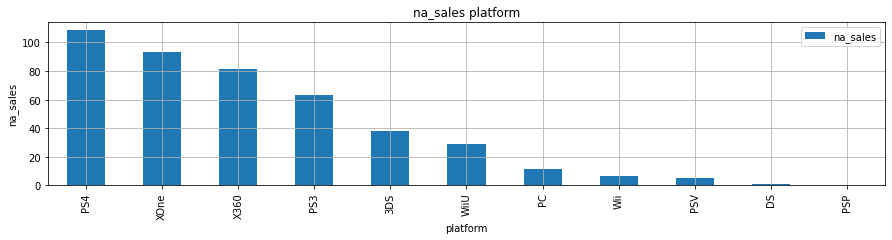

In [71]:
(
    actual_pl
    .pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')
    .sort_values('na_sales', ascending = False)
    .plot(grid=True, kind = 'bar', figsize=(15, 3), title = 'na_sales platform',\
           ylabel = 'na_sales',xlabel = 'platform'))



<AxesSubplot:title={'center':'top_5_na_sales'}, ylabel='na_sales'>

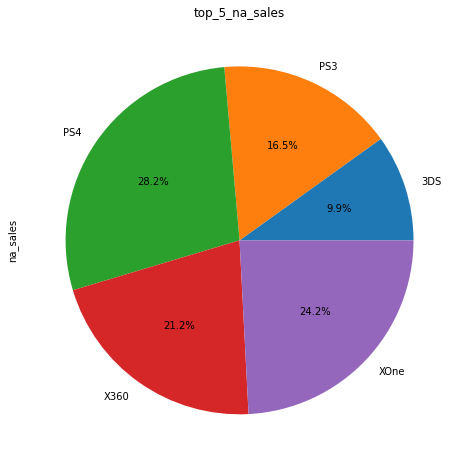

In [76]:
top_5_na_sales = actual_pl.query('platform in ["PS4", "X360" , "XOne", "PS3", "3DS"]')
(
    top_5_na_sales
    .groupby('platform')['na_sales'].sum()
    .plot(grid=True, kind = 'pie', autopct='%1.1f%%', figsize=(8, 8),title = 'top_5_na_sales' ))

Самая популярная платформа в Северной Америке -- PS4 . На нее приходится 28.2% продаж. Далее XOne -- 24.2%, Х360 -- 21.2%, PS3 -- 16.5%,  и замыкает топ-5 платформа 3DS c 9.9% продаж.

Определите для пользователя Европы: 

<AxesSubplot:title={'center':'eu_sales platform'}, xlabel='platform', ylabel='eu_sales'>

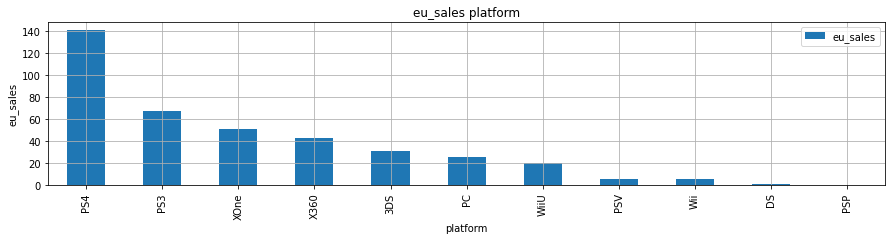

In [78]:
(
    actual_pl
    .pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')
    .sort_values('eu_sales', ascending = False)
    .plot(grid=True, kind = 'bar', figsize=(15, 3), title = 'eu_sales platform',\
           ylabel = 'eu_sales',xlabel = 'platform'))

<AxesSubplot:title={'center':'top_5_eu_sales'}, ylabel='eu_sales'>

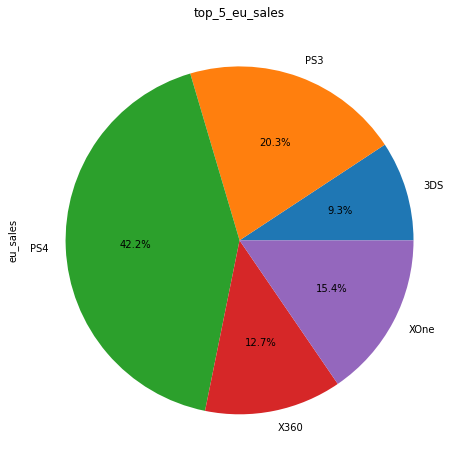

In [79]:
top_5_eu_sales = actual_pl.query('platform in ["PS4", "X360" , "XOne", "PS3", "3DS"]')
(
    top_5_eu_sales
    .groupby('platform')['eu_sales'].sum()
    .plot(grid=True, kind = 'pie', figsize=(8, 8), autopct='%1.1f%%',title = 'top_5_eu_sales' ))

Самая популярная платформа в Европе -- PS4. На нее приходится 42.2% продаж. Далее PS3 -- 20.3%, XOne -- 15.4%, X360 -- 12.7% и замыкает топ-5 платформа 3DS c 9.3% продаж.

Определите для пользователя Японии:

<AxesSubplot:title={'center':'jp_sales platform'}, xlabel='platform', ylabel='jp_sales'>

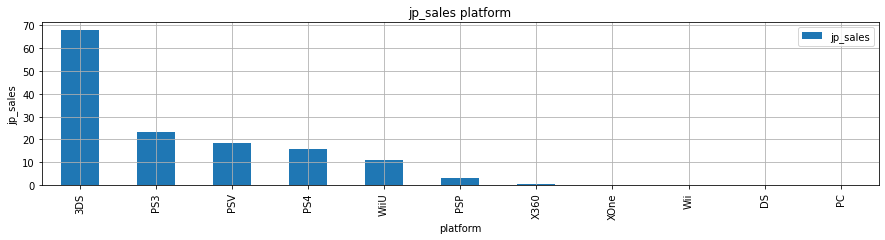

In [80]:
(
    actual_pl
    .pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')
    .sort_values('jp_sales', ascending = False)
    .plot(grid=True, kind = 'bar', figsize=(15, 3), title = 'jp_sales platform',\
           ylabel = 'jp_sales',xlabel = 'platform'))

<AxesSubplot:title={'center':'top_5_eu_sales'}, ylabel='jp_sales'>

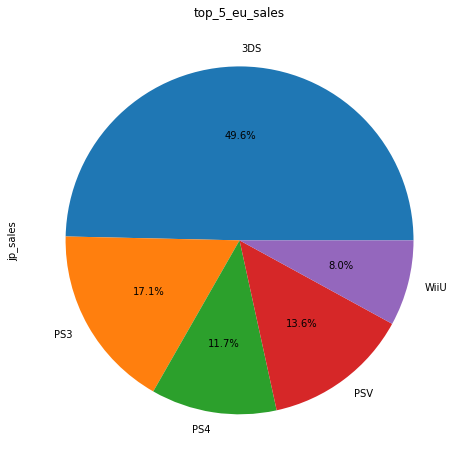

In [81]:
top_5_jp_sales = actual_pl.query('platform in ["PS4", "3DS" , "WiiU", "PS3", "PSV"]')
(
    top_5_jp_sales
    .groupby('platform')['jp_sales'].sum()
    .plot(grid=True, kind = 'pie', figsize=(8, 8), autopct='%1.1f%%',title = 'top_5_eu_sales' ))

Самая популярная платформа в Японии -- 3DS. На нее приходится 49.6% продаж. Далее PS3 -- 17.1%, PSV -- 13.6%, PS4 -- 11.7%  и замыкает топ-5 платформа WiiU c 8% продаж.

#### Самые популярные жанры (топ-5). Поясните разницу.

<AxesSubplot:title={'center':'jp_sales genre'}, xlabel='genre', ylabel='jp_sales'>

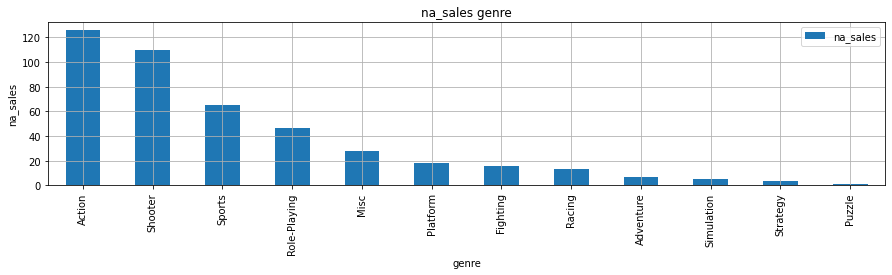

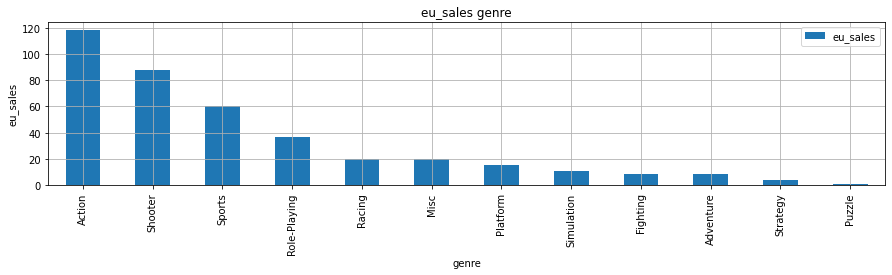

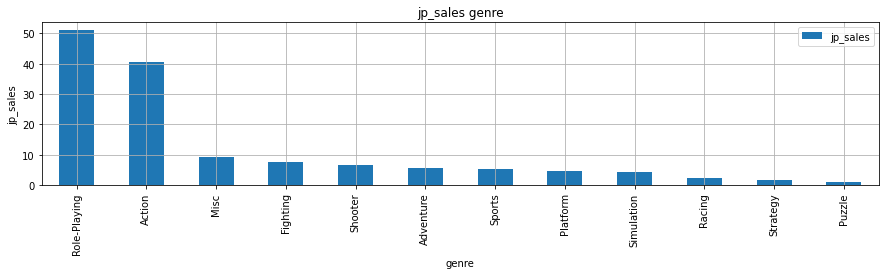

In [82]:
(
    actual_pl
    .pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum')
    .sort_values('na_sales', ascending = False)
    .plot(grid=True, kind = 'bar', figsize=(15, 3), title = 'na_sales genre',\
           ylabel = 'na_sales',xlabel = 'genre'))

(
    actual_pl
    .pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum')
    .sort_values('eu_sales', ascending = False)
    .plot(grid=True, kind = 'bar', figsize=(15, 3), title = 'eu_sales genre',\
           ylabel = 'eu_sales',xlabel = 'genre'))

(
    actual_pl
    .pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum')
    .sort_values('jp_sales', ascending = False)
    .plot(grid=True, kind = 'bar', figsize=(15, 3), title = 'jp_sales genre',\
           ylabel = 'jp_sales',xlabel = 'genre'))

Возможно, различия вызваны особенностями менталитета, культуры и платформы, которая лидирует в том или ином регионе.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

<AxesSubplot:title={'center':'jp_sales rating'}, xlabel='rating', ylabel='jp_sales'>

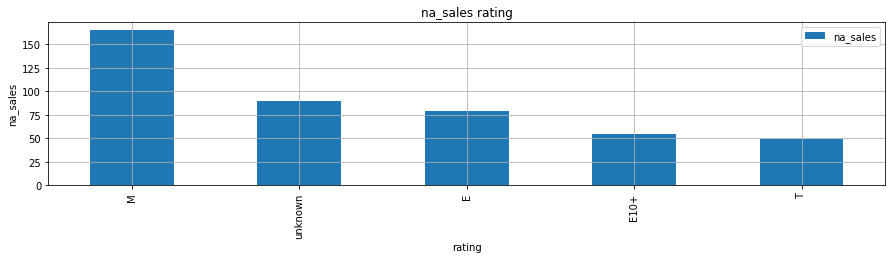

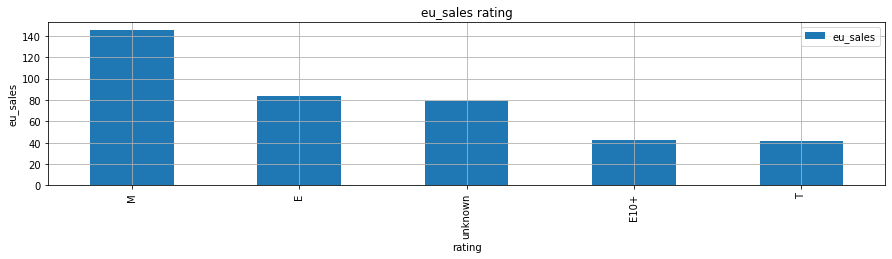

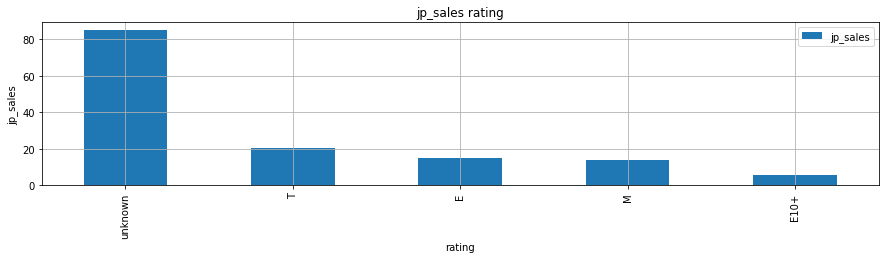

In [89]:
(
    actual_pl
    .pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum')
    .sort_values('na_sales', ascending = False)
    .plot(grid=True, kind = 'bar', figsize=(15, 3), title = 'na_sales rating',\
           ylabel = 'na_sales',xlabel = 'rating'))

(
    actual_pl
    .pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum')
    .sort_values('eu_sales', ascending = False)
    .plot(grid=True, kind = 'bar', figsize=(15, 3), title = 'eu_sales rating',\
           ylabel = 'eu_sales',xlabel = 'rating'))

(
    actual_pl
    .pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum')
    .sort_values('jp_sales', ascending = False)
    .plot(grid=True, kind = 'bar', figsize=(15, 3), title = 'jp_sales rating', ylabel = 'jp_sales',xlabel = 'rating')
)

В Северной Америке и Европе различий нет, лидируют игры для взрослых(17+), на тетьем месте игры для подростков(13+). А вот в Японии наоборот, больше продаж приносят игры для подростков, в то время как игры 17+ находятся на 3-м месте по продажам. Вторым по продаже для всех регионов идут игры без ограничений по возрасту, т.е. "для всех". На 4-ом месте для всех регионов игры "Для всех от 10 лет и старше".

### Шаг 5. Проверьте гипотезы

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Имеем 2 независимые выборки значит будем использовать двусторонний t-test. Выдвинем гипотезы.

    Нулевая: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

    Первая: Средние пользовательские рейтинги платформ Xbox One меньше, чем у PC .

In [99]:
one = actual_pl_without_nan.query('platform == "XOne"')
pc = actual_pl_without_nan.query('platform == "PC"')

In [105]:
alpha = 0.01 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(
    one['user_score'], 
    pc['user_score'],
    alternative='less')



print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.934220722560446
Не получилось отвергнуть нулевую гипотезу


In [101]:
print('Средний пользовательский рейтинг платформы Xbox One равен:', one['user_score'].mean())
print('Средний пользовательский рейтинг платформы PC равен:', pc['user_score'].mean())


Средний пользовательский рейтинг платформы Xbox One равен: 6.49308176100629
Средний пользовательский рейтинг платформы PC равен: 6.218796992481203


Не получилось отвергнуть нулевую гипотезу в оценке значимости 1%. Действительно, средние пользовательские рейтинги платформ Xbox One незначительно ниже, чем у PC. Средний пользовательский рейтинг платформы Xbox One равен: 6.49, а средний пользовательский рейтинг платформы PC равен: 6.22.

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Имеем 2 независимые выборки значит будем использовать двусторонний t-test. Выдвинем гипотезы.

    Нулевая: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

    Первая: Средние пользовательские рейтинги жанров Action больше, чем у Sports.

In [102]:
action = actual_pl_without_nan.query('genre == "Action"')
sports = actual_pl_without_nan.query('genre == "Sports"')

In [103]:
alpha = 0.01 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(
    action['user_score'], 
    sports['user_score'],
    alternative='greater')



print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 8.943032958875123e-16
Отвергаем нулевую гипотезу


In [104]:
print('Средний пользовательский рейтинг жанра Action равен:', action['user_score'].mean())
print('Средний пользовательский рейтинг жанра  Sports равен:', sports['user_score'].mean())

Средний пользовательский рейтинг жанра Action равен: 6.913621262458472
Средний пользовательский рейтинг жанра  Sports равен: 5.663207547169811


Отвергаем нулевую гипотезу. Средний пользовательский рейтинг пжанров Action выше, чем у Sports. Они действительно разные. Средний пользовательский рейтинг жанров Action равен: 6.91, а средний пользовательский рейтинг жанров  Sports равен: 5.66

### Шаг 6. Напишите общий вывод

В ходе проделанной работы удалось провести исследовательский и статистический анализ данных для интернет-магазина компьютерных игр «Стримчик». Из открытых источников нам были доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Целью работы было выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Необходимо сделать акцент на платформу PS4, для игр с рейтингом Т, Е, М в жанре Action для Америки и Европы. И для Японии на 3DS для игр без рейтинга в большей степени и также Т, Е, М в жанре Role play. Не обращать внимание на оценки пользоватеелй и иметь в виду оценки критиков.